In [32]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_df, clinical_df, on=['Mouse ID', 'Mouse ID'])

# Dis.reset_index()play the data table for preview
combined_df.head(11)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [33]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_grouped_df = combined_df.groupby(['Drug','Timepoint'])
grouped = combined_grouped_df['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
grouped_df = pd.DataFrame({'Tumor Volume (mm3)': grouped}).reset_index()

# Preview DataFrame
grouped_df.head(11)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [34]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err = combined_df.groupby(['Drug','Timepoint']).sem()["Tumor Volume (mm3)"]
std_err

# Convert to DataFrame
combined_tumor_df = pd.DataFrame(std_err)

# Preview DataFrame
combined_tumor_df.head().reset_index()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [35]:
# Minor Data Munging to Re-Format the Data Frames
grouped_df = grouped_df.reset_index()
grouped_df_format = grouped_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

combined_tumor_df = combined_tumor_df.reset_index()
combined_tumor_format = combined_tumor_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
grouped_df_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


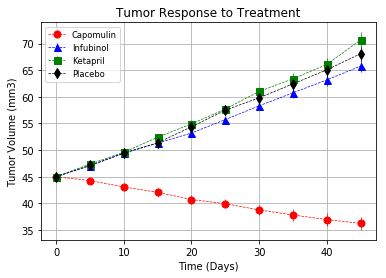

In [51]:
# Generate the Plot (with Error Bars)
plt.errorbar(grouped_df_format.index, grouped_df_format["Capomulin"], yerr=combined_tumor_format["Capomulin"], color="r", markersize=7, linestyle="dashed", marker="o",  linewidth=0.70)
plt.errorbar(grouped_df_format.index, grouped_df_format["Infubinol"], yerr=combined_tumor_format["Infubinol"], color="b", markersize=7, linestyle="dashed", marker="^",  linewidth=0.70)
plt.errorbar(grouped_df_format.index, grouped_df_format["Ketapril"], yerr=combined_tumor_format["Ketapril"], color="g", markersize=7, linestyle="dashed", marker="s", linewidth=0.70)
plt.errorbar(grouped_df_format.index, grouped_df_format["Placebo"], yerr=combined_tumor_format["Placebo"], color="k", markersize=7, linestyle="dashed", marker="d", linewidth=0.70)

plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.title("Tumor Response to Treatment")

plt.legend(fontsize="small", loc="best", fancybox=True)

# Save the Figure
plt.savefig("Plots/figure1.png")

# Show the Figure
plt.show()



## Metastatic Response to Treatment

In [37]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metsite_data = combined_df.groupby(['Drug','Timepoint'])
Metsite_data_mean = Metsite_data['Metastatic Sites'].mean()


# Convert to DataFrame
Metsite_data_mean_df = pd.DataFrame({'Metastatic Sites': Metsite_data_mean})

# Preview DataFrame
Metsite_data_mean_df.head().reset_index()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [38]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
std_err_metstatic = combined_df.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
std_err_metstatic
# Convert to DataFrame
std_err_metstatic_df = pd.DataFrame(std_err_metstatic)

# Preview DataFrame
std_err_metstatic_df.head().reset_index()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [39]:
# Minor Data Munging to Re-Format the Data Frames
Metsite_data_mean_df = Metsite_data_mean_df.reset_index()
std_err_metstatic_df = std_err_metstatic_df.reset_index()
metstatic_format_mean = Metsite_data_mean_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
metstatic_format_sem = std_err_metstatic_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
metstatic_format_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


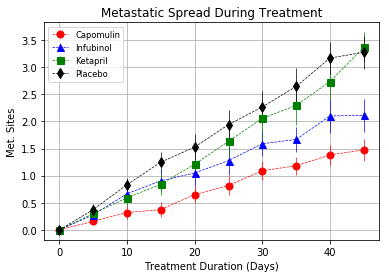

In [52]:
# Generate the Plot (with Error Bars)
plt.errorbar(metstatic_format_mean.index, metstatic_format_mean["Capomulin"], yerr=metstatic_format_sem["Capomulin"], color="r", markersize=7, linestyle="dashed", marker="o",  linewidth=0.70)
plt.errorbar(metstatic_format_mean.index, metstatic_format_mean["Infubinol"], yerr=metstatic_format_sem["Infubinol"], color="b", markersize=7, linestyle="dashed", marker="^",  linewidth=0.70)
plt.errorbar(metstatic_format_mean.index, metstatic_format_mean["Ketapril"], yerr=metstatic_format_sem["Ketapril"], color="g", markersize=7, linestyle="dashed", marker="s", linewidth=0.70)
plt.errorbar(metstatic_format_mean.index, metstatic_format_mean["Placebo"], yerr=metstatic_format_sem["Placebo"], color="k", markersize=7, linestyle="dashed", marker="d", linewidth=0.70)

plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)'')
plt.grid(True)
plt.title('Metastatic Spread During Treatment')

plt.legend(fontsize='small', loc='best', fancybox=True)

# Save the Figure
plt.savefig('Plots/figure2.png')

# Show the Figure
plt.show()


## Survival Rates

In [48]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_df = combined_df

mice_count_df['Mouse Count'] = mice_count_df['Mouse ID'].count()

mice_count = mice_count_df.groupby(['Drug','Timepoint'])

mice_count_grouped = mice_count['Mouse Count'].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count_grouped)

# Preview DataFrame
mice_count_df.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [49]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.reset_index()
mice_count_df_format = mice_count_df.pivot(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
mice_count_df_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


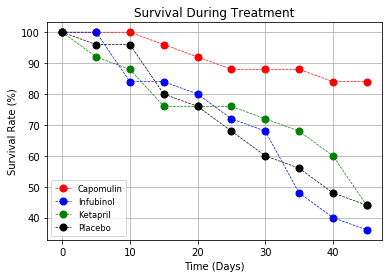

In [58]:
# Generate the Plot (Accounting for percentages)
plt.plot ((mice_count_df_format['Capomulin']/25*100), color="r", markersize=7, linestyle="dashed", marker="o",  linewidth=0.70)
plt.plot ((mice_count_df_format['Infubinol']/25*100), color="b", markersize=7, linestyle="dashed", marker="o",  linewidth=0.70)
plt.plot ((mice_count_df_format['Ketapril']/25*100), color="g", markersize=7, linestyle="dashed", marker="o",  linewidth=0.70)
plt.plot ((mice_count_df_format['Placebo']/25*100), color="k", markersize=7, linestyle="dashed", marker="o",  linewidth=0.70)


plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [66]:
# Calculate the percent changes for each drug
drug_change = combined_df.groupby(['Drug'])
percent_change = drug_change['Tumor Volume (mm3)']
percent_change.count()
# Display the data to confirm


Drug
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     194
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

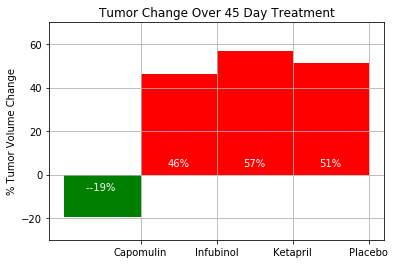